# 2. Évaluation du modèle développé par le consultant précédent
### On dispose du code d'un consultant qui a travaillé avant nous sur le sujet en développant et en entraînant un premier modèle de prédiction.

In [15]:
# Le consultant a d'abord fait les imports nécessaires :
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score

In [16]:
# Le consultant a ensuite ouvert le fichier de données .csv :
breast_cancer = pd.read_csv("breast_cancer.csv")

# Il a séparé les features de la target :
features, target = breast_cancer.loc[:, 'radius_mean':'fractal_dimension_worst'], breast_cancer["diagnosis"]

# Il a splité le dataframe en 2 (en données d'entraînement et en données de test):
# Il a choisi une test_size de 0,4 parce que l'échantillon est trop petit pour utiliser la séparation standard de 0,25.
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size = 0.4)

# Il a standardisé les données :  
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

#### En quoi consiste la standardisation des données? Pourquoi est-elle importante ici?
La normalisation standard, aussi appelée standardisation, est un procédé de pré-traitement des données qui permet de
redimensionner des variables numériques pour les rendre comparables sur une échelle commune sans en déformer les différences.
La classe StandardScaler() de scikit-learn va recalculer chaque attribut afin que l'ensemble ait une moyenne égale à 0
et un écart-type égal à 1.

#### Expliquez à quoi sert le fait de séparer les données en données d'entraînement et en données de test.
La méthode fit_transform() de la classe StandardScaler() est utilisée sur les données d'entraînement afin d'en tirer la moyenne et l'écart-type.
Ces paramètres appris sont ensuite utilisés par la méthode transformer(), également de la classe StandardScaler(), pour mettre à l'échelle
les données de test.

## 2.1 Modèle original : Decision Tree

In [17]:
# Le consultant a initalisé son modèle : 
tree_classif = tree.DecisionTreeClassifier()

#### Expliquez simplement comment fonctionnent les arbres de décision.
Les arbres de décision (Decision Tree) font partie de la catégorie des algorithmes d’apprentissage supervisés.
Sous la forme graphique d’un arbre, on représente les résultats possibles d'une série de choix interconnectés.
Les décisions prises sont situées aux extrémités des branches de l'arbre (ses feuilles) et sont atteintes en fonction de
décisions prises à chaque étape précédente en appliquant de manière itérative des règles logiques très simples.
L’algorithme est capable de tester chaque variable et d'utiliser une métrique pour sélectionner les variables discriminantes
au sein de données brutes qui sont souvent non-structurées et volumineuses.
Un arbre de décision modélise donc une hiérarchie de tests pour prédire un résultat : soit une catégorie (Classification Tree en classification)
soit une valeur numérique (Regression Tree en prédiction).
Les arbres de décision ont pour avantage d’être simples : nécessitant une préparation minimale des données, très rapides à entrainer,
peu coûteux en temps de calcul et faciles à interpréter.

In [18]:
# Le consultant a entraîné son modèle sur ses données d'entraînement :
tree_classif.fit(feat_train, target_train)

# Puis il l'a utilisé pour prédire sur les données de test :
predict_class = tree_classif.predict(feat_test)

In [19]:
# Le consultant a enfin calculé l'accuracy de son modèle. On l'affiche ici en conservant 2 décimales : 
acc = accuracy_score(predict_class, target_test)
print(f"model accuracy : {round(acc,3)}")

model accuracy : 0.943


#### Quelles sont les limites de la métrique choisie pour évaluer le modèle?
Pour évaluer son modèle de classification, le consultant a choisi comme métrique l'accuracy qui mesure la proportion de prédictions exactes.
Le calcul établit le rapport entre le nombre de prédictions correctes (= vrais positifs + vrais négatifs) et
le nombre total de prédictions, correctes ET incorrectes (= vrais positifs + faux positifs + vrais négatifs + faux positifs).
C'est l'indicateur le plus simple de la performance d'un modèle de classification : une valeur unique, facile à calculer et à interpréter.
L’accuracy présente cependant de fortes limites lorsque les données d'étude sont déséquilibrées, c'est-à-dire lorsqu’une des classes est
largement plus fréquente que l’autre.

#### Pour le même modèle, sortez d'autres métriques d'évaluation en les commentant (précision, recall, F1 score, matrice de confusion...).
Pour évaluer le modèle de classification du consultant, on aurait pu choisir d'autres métriques:

- La precision, également appelée Positive Predictive Value, correspond au taux de prédictions correctes parmi les prédictions positives.
Le calcul établit le rapport entre le nombre de positifs bien prédit (= vrais positifs) et le nombre total de positifs prédit
(= vrais positifs + faux positifs).
La precision mesure la capacité du modèle à ne pas faire d’erreur lors d’une prédiction positive.
Plus la precision est élevée et plus le modèle minimise le nombre de faux positifs.

- Le recall, également appelé Sensitivity, True Positive Rate ou encore Hit Rate, correspond au taux de prédictions positives correctes.
Le calcul établit le rapport entre le nombre de positifs bien prédits (= vrais positifs) et le nombre total de positifs réel
(= vrais positifs + faux négatifs).
Le recall mesure la capacité du modèle à détecter l’ensemble des positifs. 
Plus le recall est élevé et plus le modèle maximise le nombre de vrais positifs.

- Le F1-score mesure la capacité d’un modèle à bien prédire les positifs,
tant en termes de precision (taux de prédictions positives correctes) qu’en termes de recall (taux de positifs correctement prédits).
Le F1-score compare les prédictions positives correctes (= vrais positifs) aux erreurs faites par le modèle (= faux positifs + faux négatifs).
Il correspond à la moyenne harmonique de la precision et du recall, qui doivent tous les 2 être élevés pour que le F1-score le soit aussi.
Le F1-score a en commun avec l’accuracy de résumer la performance d’un modèle en un seul indicateur pour chaque seuil de classification.
Il est plus complexe mais a l’avantage d’être robuste en présence de données déséquilibrées.

- La matrice de confusion (Confusion Matrix) est le socle sur lequel s’appuient toutes les métriques de classification :
accuracy, Précision-Recall, F1-score, ROC curve,...
Dans le cas à 2 classes, la matrice de confusion est un tableau à 4 valeurs représentant les différentes combinaisons de valeurs réelles et
de valeurs prédites et dépend d’un seuil de classification (Classification Threshold) pour traduire ces probabilités en labels.
Pour un seuil faible, il y aura plus de prédictions positives que pour un seuil élevé.
La précision de la matrice correspond au calcul du rapport entre le nombre de positifs et de négatifs bien prédits (= vrais positifs + vrais négatifs)
et le nombre total de prédictions, correctes ET incorrectes (= vrais positifs + faux positifs + vrais négatifs + faux positifs).

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       145
           M       0.91      0.94      0.92        83

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



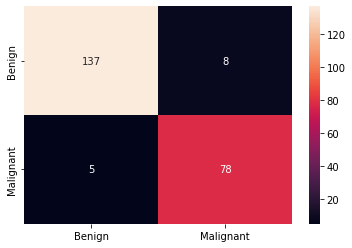

In [20]:
# Nous faisons les imports supplémentaires nécessaires :
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Pour évaluer ce modèle avec d'autres métriques, nous ajoutons des noms aux index et aux colonnes de la matrice de confusion :
classes_names = ['Benign','Malignant']
cm = pd.DataFrame(confusion_matrix(target_test, predict_class), 
                  columns=classes_names, index = classes_names)

# Nous affichons une heatmap de seaborn pour visualiser la matrice de confusion :
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(target_test, predict_class))

## 2.2 Modèle complémentaire  : Nearest Neighbors Classification

model accuracy : 0.943
              precision    recall  f1-score   support

           B       0.92      1.00      0.96       145
           M       1.00      0.84      0.92        83

    accuracy                           0.94       228
   macro avg       0.96      0.92      0.94       228
weighted avg       0.95      0.94      0.94       228



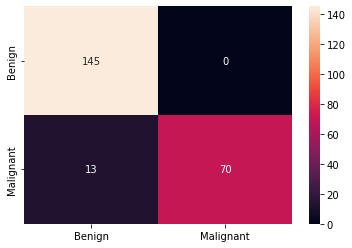

In [21]:
# Nous faisons les imports supplémentaires nécessaires :
from sklearn.neighbors import KNeighborsClassifier
import warnings

# On ignore les warnings :
warnings.simplefilter('ignore')

# Nous initalisons ce nouveau modèle : 
neighbors_classif = KNeighborsClassifier(n_neighbors=2)

# Nous entraînons ce modèle sur les données d'entraînement :
neighbors_classif.fit(feat_train, target_train)

# Puis nous l'utilisons pour prédire sur les données de test :
predict_class = neighbors_classif.predict(feat_test)

# Nous calculons l'accuracy de ce modèle. On l'affiche ici en conservant 2 décimales : 
acc = accuracy_score(predict_class, target_test)
print(f"model accuracy : {round(acc,3)}")

# Pour évaluer ce modèle avec d'autres métriques, nous ajoutons des noms aux index et aux colonnes de la matrice de confusion :
classes_names = ['Benign','Malignant']
cm = pd.DataFrame(confusion_matrix(target_test, predict_class), 
                  columns=classes_names, index = classes_names)

# Nous affichons une heatmap de seaborn pour visualiser la matrice de confusion :
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(target_test, predict_class))

Pour dix splits de notre dataframe de données, on obtient pour :  
- arbre de décision acc = 0,934 / 0,877 / 0,93 / 0,904 / 0,93 / 0,895 / 0,921 / 0,912 / 0,925 / 0,864, soit _**0,909**_ en moyenne  
- k plus proches voisins acc = 0,965 / 0,947 / 0,974 / 0,969 / 0,956 / 0,956 / 0,96 / 0,947 / 0,947 / 0,969 soit **_0,959_** en moyenne  

On peut voir que pour ces données le modèle KNN est plus précis sur un plus grand nombre de tests et donc ce modèle est le plus adapté.  

# 3. Entraînement d'un modèle concurrent  

In [22]:
# On fait les imports supplémentaires nécessaires :
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [23]:
# On développe un modèle concurrent en conservant plusieurs variables discriminantes :
# On sépare les features du target :
# En utilisant Les 8 variables discriminantes identifiées précédemment:
#features, target = breast_cancer.loc[:, ['concave points_worst', 'concavity_worst', 'radius_mean', 'radius_worst', 'perimeter_mean', 'perimeter_worst', 'area_mean', 'area_worst']], breast_cancer["diagnosis"]

# En utilisant 5 des variables discriminantes identifiées précédemment:
#features, target = breast_cancer.loc[:, ['concave points_worst', 'concavity_worst', 'radius_worst', 'perimeter_worst', 'area_worst']], breast_cancer["diagnosis"]

# En utilisant 3 des variables discriminantes identifiées précédemment:
features, target = breast_cancer.loc[:, ['concave points_worst', 'radius_mean','perimeter_worst']], breast_cancer["diagnosis"]

# On split notre dataframe en 2 :
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size = 0.4)

# On standardise les données :  
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

## 3.1 Utilisation du modèle Nearest Neighbors Classification

Le modèle des k plus proches voisins (KNN ou K-NN) est un modèle supervisé.  
Il utilise la proximité pour effectuer des classifications ou des prédictions.  
Il est généralement utilisé comme algorithme de classification, en partant de l'hypothèse que des points similaires peuvent être trouvés les uns à côté des autres.

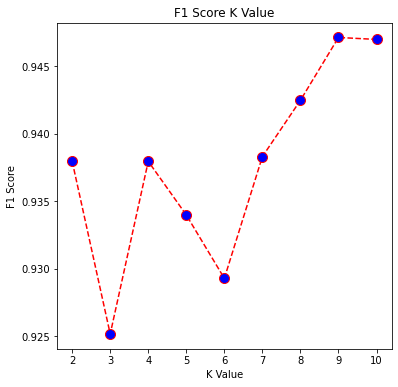

In [24]:
f1s = []

# On calcule le score f1 pour des valeurs de K entre 2 et 10 (inclus) :
for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feat_train, target_train)
    pred_i = knn.predict(feat_test)
    # On utilise average='weighted' pour calculer le "weighted average" pour nos 2 classes Bénin et Malin :
    f1s.append(f1_score(target_test, pred_i, average='weighted'))

plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

plt.show()

model accuracy : 0.939
              precision    recall  f1-score   support

           B       0.93      0.98      0.95       142
           M       0.96      0.87      0.91        86

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



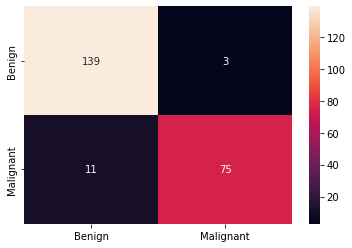

In [25]:
# On initalise le modèle : 
neighbors_classif = KNeighborsClassifier(n_neighbors=2)

# On l'entraîne sur nos données d'entraînement :
neighbors_classif.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test :
predict_class = neighbors_classif.predict(feat_test)

# On calcule l'accuracy du modèle :  
acc = accuracy_score(predict_class, target_test)
print(f"model accuracy : {round(acc,3)}")

# On ajoute des noms aux index et aux colonnes à la matrice de confusion
classes_names = ['Benign','Malignant']
cm = pd.DataFrame(confusion_matrix(target_test, predict_class), 
                  columns=classes_names, index = classes_names)

# On affiche une heatmap de seaborn pour visualiser la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(target_test, predict_class))

## 3.2 Utilisation du modèle Support Vector Machines

Le modèle Support Vector Machines (SVM) est un modèle d'apprentissage utilisé principalement en marchine learning pour faire de la classification.  
Ce modèle sépare les données et crée des frontières afin de créer de groupes de données.  
Il existe pour la fonction de décision du modèle différentes fonctions mathématiques (linéaire, non linéaire, polynomial, sigmoïde et fonction de base radiale).

In [26]:
# Nous faisons les imports supplémentaires nécessaires :
from sklearn.svm import SVC

model accuracy : 0.939
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       142
           M       0.90      0.94      0.92        86

    accuracy                           0.94       228
   macro avg       0.93      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



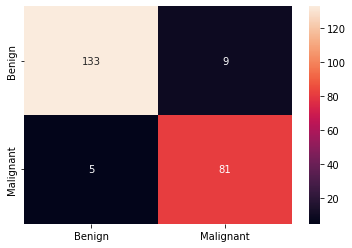

In [28]:
# On initalise le modèle : 
classifier = SVC(kernel = 'linear', random_state = 0)

# On l'entraîne sur nos données d'entraînement :
classifier.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test :
predict_class = classifier.predict(feat_test)

# On calcule l'accuracy du modèle :  
acc = accuracy_score(predict_class, target_test)
print(f"model accuracy : {round(acc,3)}")

# On ajoute des noms aux index et aux colonnes à la matrice de confusion
classes_names = ['Benign','Malignant']
cm = pd.DataFrame(confusion_matrix(target_test, predict_class), 
                  columns=classes_names, index = classes_names)

# On affiche une heatmap de seaborn pour visualiser la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(target_test, predict_class))